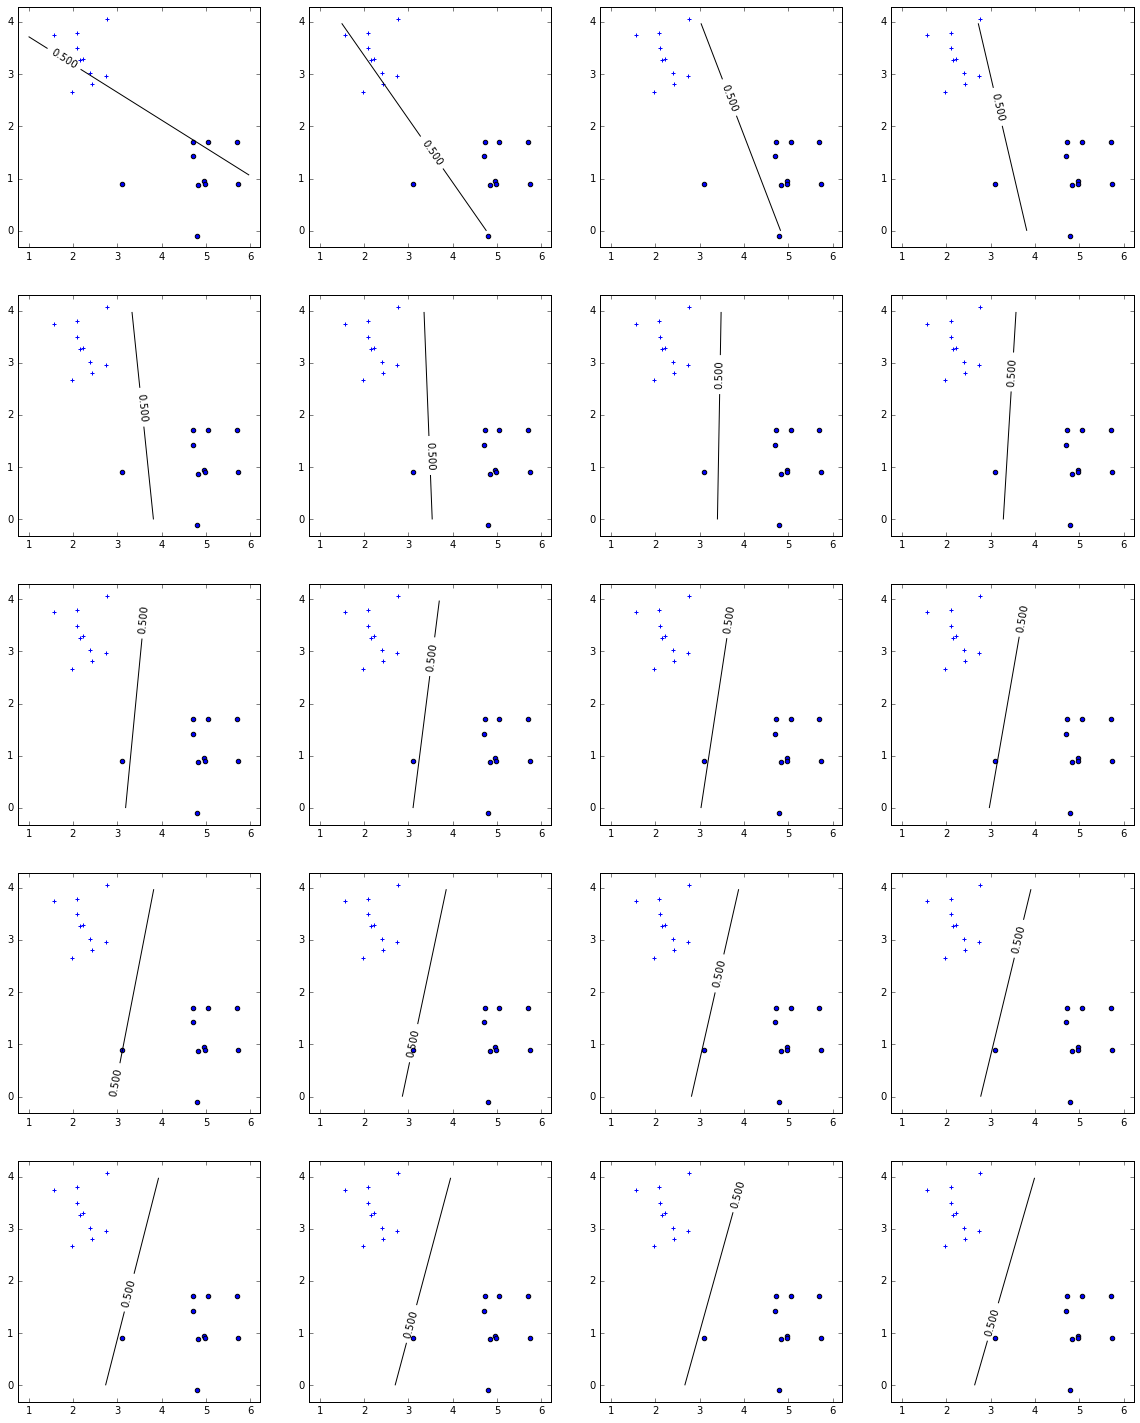

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pyplot

# Génération des données d'entraînement
X_1 = 0.5*np.random.randn(10,2) + np.array([[5,1]]) # Gaussienne centrée en mu_1=[5,1]
t_1 = np.ones(10)
X_2 = 0.5*np.random.randn(10,2) + np.array([[2,3]]) # Gaussienne centrée en mu_2=[2,3]
t_2 = np.zeros(10)

# Fusionne toutes les données dans un seul ensemble d'entraînement
X = np.vstack([X_1,X_2])
t = np.hstack([t_1,t_2])

#Mélange dans un ordre aléatoire
p = np.random.permutation(20)     
X = X[p,:]
t = t[p]

def sigm(a):
    return 1./(1. + np.exp(-a))

# Pour visualiser le classifieur
delta = 0.025
ix = np.arange(1.0, 6.0, delta)
iy = np.arange(0.0, 4.0, delta)
iX, iY = np.meshgrid(ix, iy)

# Initialisation du classifieur de la régression logistique
# (ces valeurs sont choisies pour rendre l'illustration plus intéressante...
#  normalement on initialiserait à 0.)
w = np.array([1.,2.])
w_0 = -5.
eta = 0.5 # Normalement, on utiliserait une valeur plus petite

# Descente de gradient de type "BATCH" pour la régression logistique
pyplot.subplots(figsize=(20,25))
for it in range(20):
    # Calcul p(C_1 | x)
    o = sigm(w_0 + np.dot(X,w))
    
    # Calcul les gradients de w et w_0
    grad_w = np.dot((o-t),X)
    grad_w_0 = np.sum(o-t)
    
    # Mise à jour des paramètres
    w -= eta/20. * grad_w
    w_0 -= eta/20. * grad_w_0
    
    # Visualisation
    pyplot.subplot(5,4,1+it)
    dummy = pyplot.scatter(X_1[:,0],X_1[:,1])
    dummy = pyplot.scatter(X_2[:,0],X_2[:,1],marker='+')

    contour_out = sigm(np.dot(np.hstack([iX.reshape((-1,1)),iY.reshape((-1,1))]),w)+w_0).reshape(iX.shape)
    dummy = pyplot.contour(iX,iY,contour_out,[0.5], colors='k')
    pyplot.clabel(dummy, inline=1, fontsize=10)